In [83]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize, least_squares

In [84]:
data_filename = 'data/300_1500_0.2_scan.npy'
amplitude = np.load(data_filename)

In [85]:
frequency = np.linspace(300, 1500, amplitude.size)

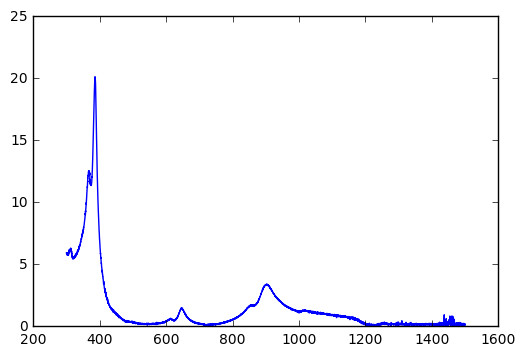

In [86]:
plt.plot(frequency, amplitude)

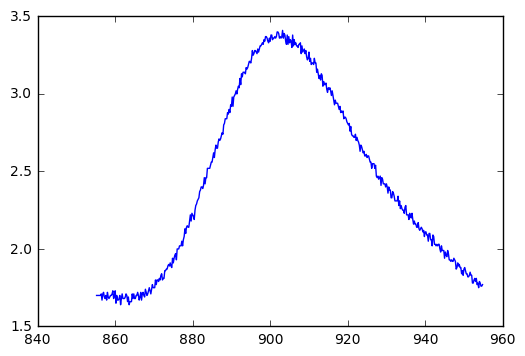

In [134]:
width = 50
subset_frequency = frequency[np.abs(frequency-905)<width]
subset_amplitude = amplitude[np.abs(frequency-905)<width]
plt.plot(
    frequency[np.abs(frequency-905)<width],
    amplitude[np.abs(frequency-905)<width])

In [136]:
def error_func(x, subset_frequency, subset_amplitude):
    a1, b1, c1 = x[0], x[1], x[2]#x[0], x[1], x[2]
    gaussian_1 = a1*np.exp(-np.square(subset_frequency-b1)/(2.*c1**2.))
    a2, b2, c2 = x[3], x[4], x[5]#x[3], x[4], x[5]
    gaussian_2 = a2*np.exp(-np.square(subset_frequency-b2)/(2.*c2**2.))
    a3, b3 = x[6], x[7]
    linear_fit = a3*subset_frequency + b3
    return np.sum(np.square(gaussian_2+linear_fit-subset_amplitude))

fitting = minimize(
    error_func, x0=[1.5, 850, 20, 3.0, 900, 20, 2., 1.0], args=(subset_frequency, subset_amplitude), 
    method="Nelder-Mead", tol=1e-5, options={'maxiter':15000})
x = fitting.x
x

array([  2.09484870e+00,   9.49861559e+02,   1.02052348e+02,
         1.66236345e+00,   9.03865520e+02,   1.74010650e+01,
         3.51959483e-03,  -1.47200029e+00])

2.09484870361 949.861558822 102.05234809
1.6623634481 903.865520246 17.4010649865


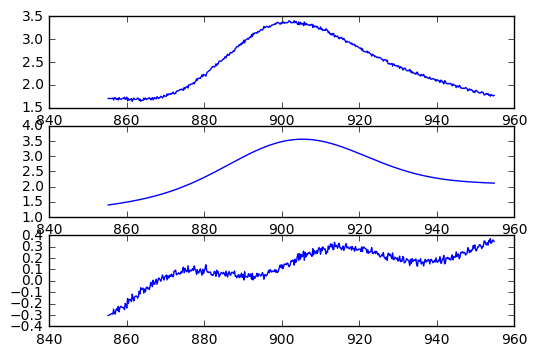

In [138]:
a, b, c = x[0], x[1], x[2]
print(a, b, c)
gaussian_1 = a*np.exp(-np.square(subset_frequency-b)/(2.*c**2.))
a, b, c = x[3], x[4], x[5]
print(a, b, c)
gaussian_2 = a*np.exp(-np.square(subset_frequency-b)/(2.*c**2.))
a, b = x[6], x[7]
linear_fit = 0#a*subset_frequency + b
plt.subplot(311)
plt.plot(
    subset_frequency,
    subset_amplitude)
plt.subplot(312)
plt.plot(
    subset_frequency,
    gaussian_1+gaussian_2+linear_fit)
plt.subplot(313)
plt.plot(
    subset_frequency,
    gaussian_1+gaussian_2+linear_fit-subset_amplitude)